<a href="https://colab.research.google.com/github/MarinaSokolova111/OPDA/blob/main/%D0%9E%D0%9F%D0%94%D0%90_%D0%9B%D0%B0%D0%B1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и обработка данных

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Indonesia'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [ ]:
df.head()

,Rank,Title,Admissions,Distributor,Year,Director
0,1,Warkop DKI Reborn: Jangkrik Boss! Part 1,6858616,Falcon Pictures,2016,Anggy Umbara
1,2,Dilan 1990,6315664,Max PicturesFalcon Pictures,2018,Fajar BustomiPidi Baiq
2,3,Dilan 1991,5253411,Max Pictures,2019,Fajar BustomiPidi Baiq
3,4,Laskar Pelangi,4719453,Miles Films,2008,Riri Riza
4,5,Habibie & Ainun,4583641,MD Pictures,2012,Faozan Rizal


In [ ]:
df.drop(['Title','Director', 'Rank', 'Distributor'], axis=1, inplace=True)

In [ ]:
df['Admissions']=df['Admissions'].astype('float')
df['Year']=df['Year'].astype('float')
Year= df['Year']
Admissions = df['Admissions']

# Тестовый набор 

In [ ]:
from numpy import mean 
from numpy import std

In [ ]:
print('mean=%.3f stdv=%.3f' % (mean(Year), std(Year)))

mean=2014.403 stdv=4.699


In [ ]:
print('mean=%.3f stdv=%.3f' % (mean(Admissions), std(Admissions)))

mean=2092351.753 stdv=1195778.698


# Визуальные проверки нормальности

In [ ]:
from matplotlib import pyplot

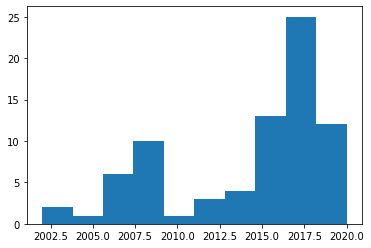

In [ ]:
pyplot.hist(Year)
pyplot.show()

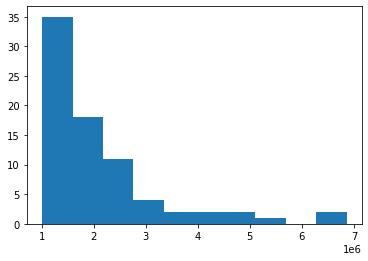

In [ ]:
pyplot.hist(Admissions)
pyplot.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


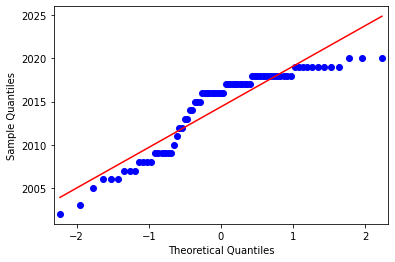

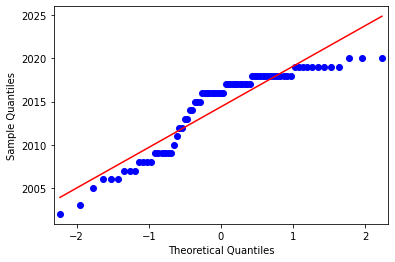

In [ ]:
qqplot(Year, line='s')

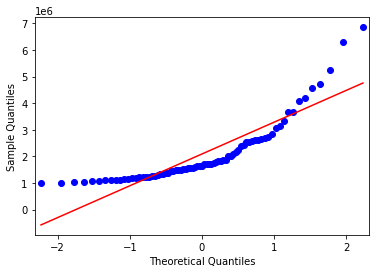

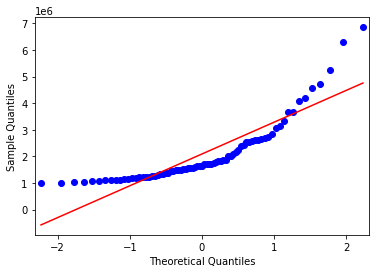

In [ ]:
qqplot(Admissions, line='s')

# Тест Шапиро-Вилка

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(Year)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.859, p=0.000


In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(Admissions)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.776, p=0.000


# Тест д'Агостино на K ^ 2

In [ ]:
from scipy.stats import normaltest

In [ ]:
stat, p = normaltest(Year)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussin')
else:
    print('Sample does looks Gaussin')

Statistics=10.009, p=0.007
Sample does looks Gaussin


In [ ]:
stat, p = normaltest(Admissions)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussin')
else:
    print('Sample does looks Gaussin')

Statistics=42.189, p=0.000
Sample does looks Gaussin


# Тест Андерсона-Дарлинга

In [ ]:
from scipy.stats import anderson
result = anderson(Year)
print('Statistis: %.3f'  % result.statistic)
p=0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f:, data looks normal ' % (sl, cv))
    else:
        print('%.3f: %.3f:, data does not looks normal ' % (sl, cv))

Statistis: 4.495
15.000: 0.550:, data does not looks normal 
10.000: 0.626:, data does not looks normal 
5.000: 0.751:, data does not looks normal 
2.500: 0.876:, data does not looks normal 
1.000: 1.042:, data does not looks normal 


In [ ]:
from scipy.stats import anderson
result = anderson(Admissions)
print('Statistis: %.3f'  % result.statistic)
p=0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f:, data looks normal ' % (sl, cv))
    else:
        print('%.3f: %.3f:, data does not looks normal ' % (sl, cv))

Statistis: 5.252
15.000: 0.550:, data does not looks normal 
10.000: 0.626:, data does not looks normal 
5.000: 0.751:, data does not looks normal 
2.500: 0.876:, data does not looks normal 
1.000: 1.042:, data does not looks normal 


# Результат

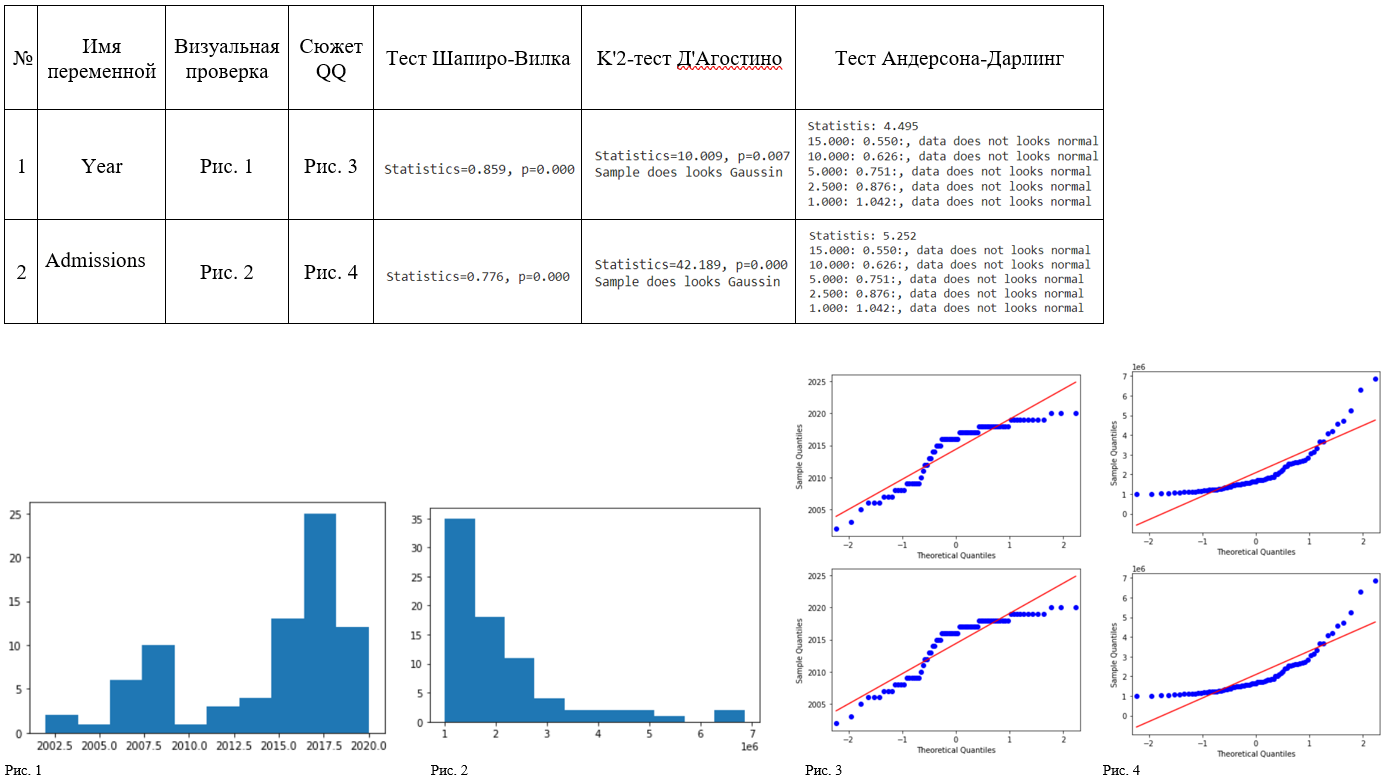